In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./signal.csv')
df

,Time [s],RESP,PLETH,V,AVR,II
0,0.000,0.35386,0.43597,0.52549,0.30392,0.72549
1,0.008,0.35679,0.43206,0.51961,0.33529,0.67059
2,0.016,0.35875,0.42815,0.51569,0.37451,0.60980
3,0.024,0.36168,0.42424,0.50588,0.41961,0.55098
4,0.032,0.36364,0.42131,0.50980,0.44902,0.50000
...,...,...,...,...,...,...
59996,479.970,0.15640,0.40567,0.50000,0.51961,0.40000
59997,479.980,0.15152,0.40371,0.50588,0.52941,0.39412
59998,479.980,0.14663,0.40176,0.50000,0.53529,0.38431
59999,479.990,0.14174,0.40176,0.50000,0.53922,0.38039


In [3]:
start = 26
sig_len = 2
leap = 0.008

t = np.arange(0, sig_len, leap)
part = (df['Time [s]'] < sig_len + start) & (df['Time [s]'] >= start)

signal = np.array(df[part][' II'])
signal -= np.mean(signal)

noise = np.random.uniform(-np.max(signal)/3, np.max(signal)/3, len(signal))
noised_signal = signal + noise

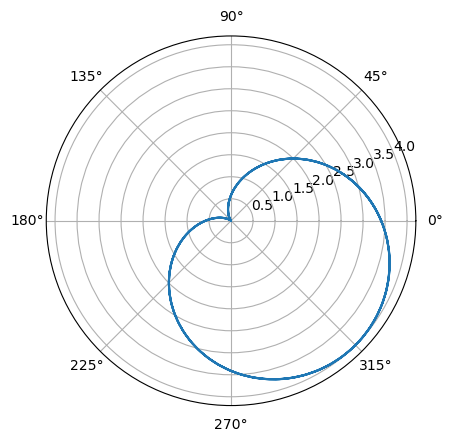

In [4]:
cardio_int = 0.65
theta = 2 * np.pi * t/cardio_int
psi = np.pi/4 * 3

cardioid = 2 * (1 - np.cos(theta-psi))

plt.polar(theta, cardioid)
plt.show()

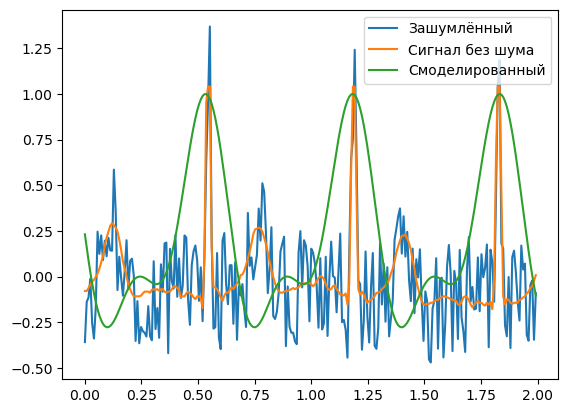

In [5]:
ra_poten = cardioid*np.cos(np.pi/6*5-theta)
ll_poten = cardioid*np.cos(-np.pi/6*4-theta)

signal_2 = ll_poten - ra_poten
signal_model = signal_2/np.max(signal_2)

plt.plot(t, noised_signal,label = 'Зашумлённый')
plt.plot(t, signal, label = 'Сигнал без шума')
plt.plot(t, signal_model, label = 'Смоделированный')
plt.legend()
plt.show()

In [6]:
dt = t[1]
d_signal_model = np.diff(signal_model)/dt

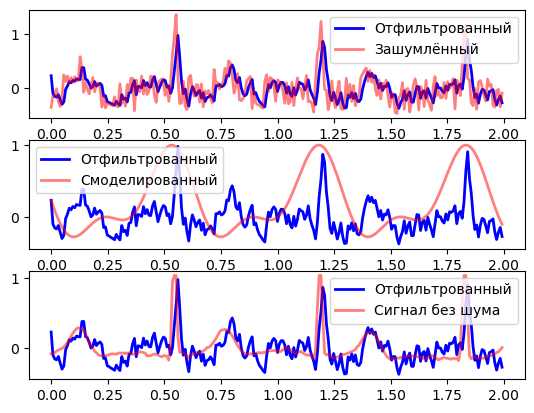

In [9]:
filtered = [signal_model[0]]
a = 0.5
b = 1 - a
predicted = signal_model[0]
for i in range(len(t) - 1):
    predicted = predicted + (a * (noised_signal[i] - predicted) + b * d_signal_model[i] * dt)
    filtered.append(predicted)

all_sig = [noised_signal, signal_model, signal]
labels = ['Зашумлённый', 'Смоделированный', 'Сигнал без шума']

for i in range(3):
    plt.subplot(3,1,i + 1)
    plt.plot(t, filtered, color='blue',linewidth=2, label='Отфильтрованный')
    plt.plot(t, all_sig[i], color='red', linewidth=2, label=labels[i] , alpha = 0.5)
    plt.legend()